In [1]:
from google.colab import drive

drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


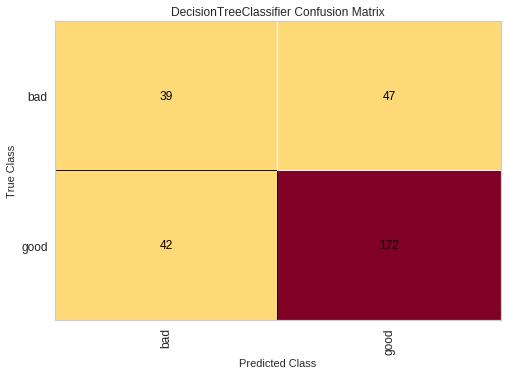

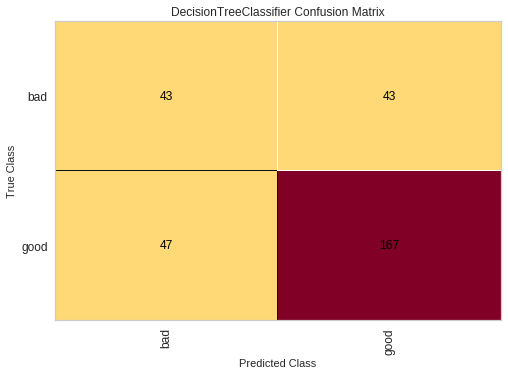

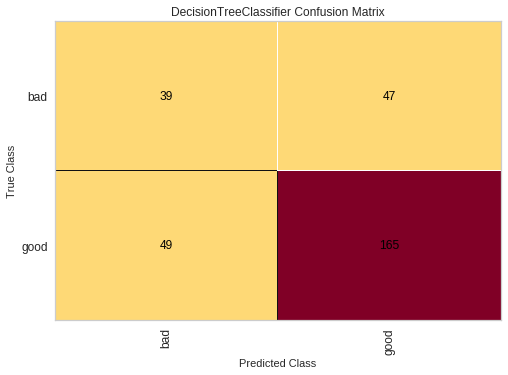

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from yellowbrick.classifier import ConfusionMatrix

base = pd.read_csv('/content/drive/My Drive/Colab Notebooks/credit-g.csv')

X = base.iloc[:,0:20].values
y = base.iloc[:, 20].values

labelencoder = LabelEncoder()
X[:,0] = labelencoder.fit_transform(X[:,0])
X[:,2] = labelencoder.fit_transform(X[:,2])
X[:,3] = labelencoder.fit_transform(X[:,3])
X[:,5] = labelencoder.fit_transform(X[:,5])
X[:,6] = labelencoder.fit_transform(X[:,6])
X[:,8] = labelencoder.fit_transform(X[:,8])
X[:,9] = labelencoder.fit_transform(X[:,9])
X[:,11] = labelencoder.fit_transform(X[:,11])
X[:,13] = labelencoder.fit_transform(X[:,13])
X[:,14] = labelencoder.fit_transform(X[:,14])
X[:,16] = labelencoder.fit_transform(X[:,16])
X[:,18] = labelencoder.fit_transform(X[:,18])
X[:,19] = labelencoder.fit_transform(X[:,19])

X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y,
                                                                  test_size = 0.3,
                                                                  random_state = 0)

# Modelo 1
modelo1 = DecisionTreeClassifier(criterion = 'entropy')
modelo1.fit(X_treinamento, y_treinamento)
export_graphviz(modelo1, out_file = 'modelo1.dot')

previsoes1 = modelo1.predict(X_teste)
accuracy_score(y_teste, previsoes1)
confusao1 = ConfusionMatrix(modelo1)
confusao1.fit(X_treinamento, y_treinamento)
confusao1.score(X_teste, y_teste)
confusao1.poof()

# Modelo 2
modelo2 = DecisionTreeClassifier(criterion = 'entropy', min_samples_split = 20)
modelo2.fit(X_treinamento, y_treinamento)
export_graphviz(modelo2, out_file = 'modelo2.dot')

previsoes2 = modelo2.predict(X_teste)
accuracy_score(y_teste, previsoes2)
confusao2 = ConfusionMatrix(modelo2)
confusao2.fit(X_treinamento, y_treinamento)
confusao2.score(X_teste, y_teste)
confusao2.poof()

# Modelo 3
modelo3 = DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf = 5, min_samples_split = 20)
modelo3.fit(X_treinamento, y_treinamento)
export_graphviz(modelo3, out_file = 'modelo3.dot')

previsoes3 = modelo3.predict(X_teste)
accuracy_score(y_teste, previsoes3)
confusao3 = ConfusionMatrix(modelo3)
confusao3.fit(X_treinamento, y_treinamento)
confusao3.score(X_teste, y_teste)
confusao3.poof()